# CA03 – Decision Tree Algorithm

## 1. Data Source and Contents
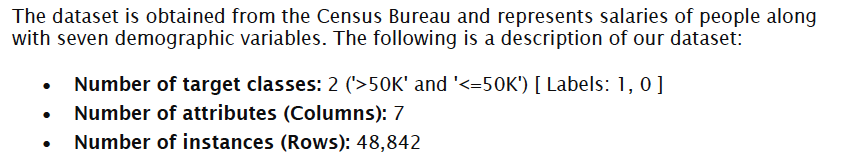

### Data Source:
Use the following exact “path” in your code as the data source:<br>
"https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"

Training and Test Data: <br>
There is a column indicating the rows to be used as “Training Data”
and “Testing Data”. <br>
You can programmatically create your Training and Testing datasets as<br>
separate dataframes in your code based on this column value.


In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [3]:
# read the CSV

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [6]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [8]:
# Look into the dataframe

print(df.shape)

(48842, 11)


In [10]:
# dataFrame statistics
print(df.describe(include = "all"))

       hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin ed

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


In [15]:
# Look into how many missing values the df has
df_num_missing = df.isna().sum()
df_num_missing

# no missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [18]:
# check duplicates
df.duplicated().sum()

40012

In [19]:
# check outliers

df["y"].describe()

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [20]:
# calculate the IQR of y
df_y_Q1 = df["y"].quantile(0.25)
df_y_Q3 = df["y"].quantile(0.75)
df_y_IQR = df_y_Q3 - df_y_Q1

In [21]:
print(f"The y IQR is: {df_y_IQR}")

The y IQR is: 0.0


In [24]:
lower_lim = df_y_Q1 - 1.5 * df_y_IQR
upper_lim = df_y_Q3 + 1.5 * df_y_IQR

In [25]:
print(f"The y lower limit: {lower_lim} and the upper limit: {upper_lim}")

The y lower limit: 0.0 and the upper limit: 0.0


In [28]:
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [29]:
df.occupation_bin.value_counts()

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [30]:
df.hours_per_week_bin.value_counts()

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

In [31]:
df.occupation_bin.value_counts()

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [32]:
df.capital_gl_bin.value_counts()

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

### 3. Build Decision Tree Classifier Model

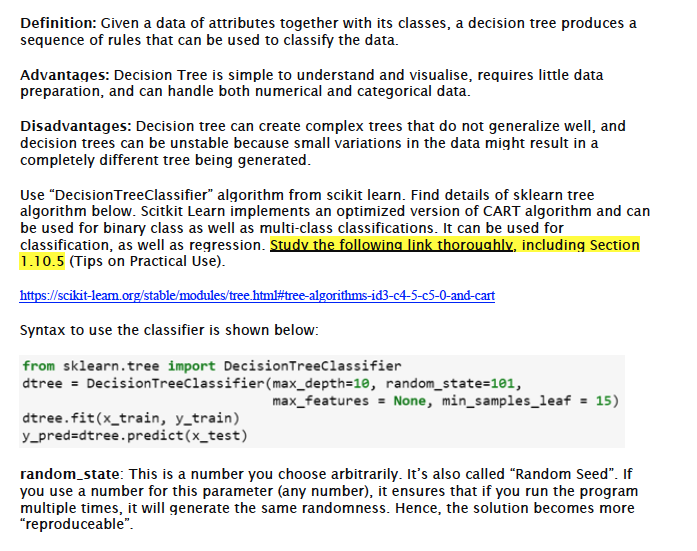

In [47]:
# read the CSV

new_df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [48]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Create a dictionary to store the transformed columns
cols_encoded = {}

# Loop through each column in the DataFrame
for col in new_df.columns:
    # Fit the LabelEncoder on the column
    le.fit(new_df[col])
    
    # Transform the column using the LabelEncoder
    cols_encoded[col] = le.transform(new_df[col])

# Replace the original columns with the encoded columns in the DataFrame
new_df = new_df.assign(**cols_encoded)

In [53]:
# Creating test and train data
train = new_df[new_df["flag"] == 1]
test = new_df[new_df["flag"] == 0]

In [54]:
# Preparing X and y variables
X_train = train.drop(["y"], axis = 1)
X_test = test.drop(["y"], axis =1)
y_train = train["y"]
y_test = test["y"]

In [55]:
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
   hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0                   1               1        1               2             2   
1                   0               4        2               0             2   
2                   1               0        1               0             2   
3                   1               0        2               0             1   
4                   1               4        2               0             0   

   education_num_bin  education_bin  workclass_bin  age_bin  flag  
0                  2              2              1        3     1  
1                  2              2              1        4     1  
2                  1              1              1        3     1  
3                  0              0              1        4     1  
4                  2              2              1        1     1  

X_test : 
       hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
32561              

In [56]:
# Use DecisionTreeClassifier from scikit learn

dtree = DecisionTreeClassifier(max_depth = 10, 
                               random_state=101, 
                               max_features = None,
                               min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

### 4. Evaluate Decision Tree Performance
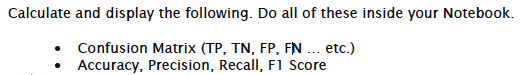

In [63]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

In [64]:
df_table = confusion_matrix(y_test, y_pred)
print (df_table)

[[11607   828]
 [ 1715  2131]]


In [65]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy
accuracy_score(y_test,y_pred) # accuracy score

# Printing classifier report after prediction
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.55      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281



### 5. Tune Decision Tree Performance
